<center><img src="http://i.imgur.com/sSaOozN.png" width="500"></center>

## Course: Computational Thinking for Governance Analytics

### Prof. José Manuel Magallanes, PhD 
* Visiting Professor of Computational Policy at Evans School of Public Policy and Governance, and eScience Institute Senior Data Science Fellow, University of Washington.
* Professor of Government and Political Methodology, Pontificia Universidad Católica del Perú. 

_____
<a id='home'></a>

# Data Preprocessing in Python: Data gathering

0. [The GitHub Repo](#part0) 
1. [Uploading files](#part1a)
2. [APIs](#part2) 
3. [Scraping](#part3) 
4. [Social media](#part4) 

One the first steps you should take when preparing an analytics project is to know where to read your files from. One usually gets a file from an email, or finds it in website, and just download it to the local computer. 
However, different from most software, like SPSS, EXCEL and STATA, **Python** or **R** need to know the **path** to the file precisely. Sometimes you are not aware of the folders' **tree** in your computer. For instance, once I have opened this Jupyter Notebook, I can find its path like this:

In [1]:
import os
os.getcwd()

'/Users/JoseManuel/Documents/Evans/2021/ComputationalThinking/Part1_PythonForPreProcessing'

____
<a id='part1a'></a>

## 1. Uploading 'proprietary software' files

Several times, you may find that you are given a file that was previously prepared with proprietary software. The most common in the policy field are:

* SPSS (file extension: **sav**).
* STATA (file extension: **dta**).
* EXCEL (file extension: **xlsx** or **xls**).

Getting these files up and running is the easiest, as they are often well organized and do not bring much pre processing challenges. However, I need to have the file where I am currently writing my code:

For sure, you can leave the file anywhere you want in your machine; but you would need to know all the *path* to the file. To avoid that, it is better to store your data in the *cloud*. If you need the file in the same format, GitHub is great choice. For instance, I have a repository (aka *repo*) with several data files [here](https://github.com/EvansDataScience/data). I will upload the file *hsb_ok* into memory in the next examples. 

The files I will use look like a data table which are known as the **data frame**, like the ones you use in Excel. Python needs the help of external packages to read those data frames. **Pandas** is a great package that will make our life easier, so make sure it is installed:

In [4]:
!pip show pandas

Name: pandas
Version: 1.3.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /Users/JoseManuel/anaconda3/envs/Evans_GovAnalytics/lib/python3.7/site-packages
Requires: numpy, python-dateutil, pytz
Required-by: statsmodels, plotnine, mizani


If you do not have *pandas*, please install it by writing:

In [3]:
#!pip install pandas   #in 

     |████████████████████████████████| 11.0 MB 1.0 MB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.0
    Uninstalling pandas-1.2.0:
      Successfully uninstalled pandas-1.2.0


 You can also install it in Anaconda Navigator or via the Terminal. Remember that you are writing an interactive document, so I recommend that you write a **_#_** before the codes you do not need to execute more than once.
 
 If you have an older version of Pandas than the one I have, you can update yours like this:

In [ ]:
#!pip install pandas -U

[home](#home)

____

### 1.1 Reading a STATA file:

Let me open the **hsb_ok.dta** file:

In [5]:
import pandas as pd

location='https://github.com/EvansDataScience/data/raw/master/'
fileDTA=location+'hsb_ok.dta'
dataStata=pd.read_stata(fileDTA)

The object **dataStata** has received a data frame, let's check the contents:

In [6]:
dataStata

,id,sex,race,ses,sctyp,hsp,locus,concpt,mot,car,rdg,wrtg,math,sci,civ
0,1,Female,Asian,Low,Public,Vocational/Technical,0.29,0.88,0.67,Professional_2,33.6,43.7,40.2,39.0,40.6
1,2,Male,Asian,Low,Public,Academic preparatory,-0.42,0.03,0.33,Craftsman,46.9,35.9,41.9,36.3,45.6
2,3,Female,Asian,Low,Public,Academic preparatory,0.71,0.03,0.67,Professional_1,41.6,59.3,41.9,44.4,45.6
3,4,Female,Asian,Medium,Public,Vocational/Technical,0.06,0.03,0.00,Service,38.9,41.1,32.7,41.7,40.6
4,5,Female,Asian,Medium,Public,Vocational/Technical,0.22,-0.28,0.00,Clerical,36.3,48.9,39.5,41.7,45.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,Male,Hispanic,High,Private,General,0.27,-1.05,0.33,Professional_1,60.1,54.1,56.3,55.3,55.6
596,597,Male,Hispanic,Medium,Private,General,0.55,0.34,1.00,Technical,62.7,61.9,72.9,63.4,55.6
597,598,Male,Hispanic,Medium,Private,General,-0.61,0.34,0.67,Technical,68.0,54.1,74.6,66.1,65.5
598,599,Female,Hispanic,Medium,Private,General,0.23,0.94,1.00,Professional_2,57.4,67.1,57.9,60.7,55.6


[home](#home)

____

### 1.2 Reading an SPSS file

Pandas [tells](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_spss.html) there is a function **read_spss**, so you may want to try this:

In [9]:
fileSPSS=location + "hsb_ok.sav"
dataSPSS= pd.read_spss(fileSPSS)

ReadstatError: Unable to open file

In [8]:
import pyreadstat

You need here some extra help from the package **pyreadstat**. Please install it:

In [ ]:
#!pip install pyreadstat

Notice that **pyreadstat** cannot read from an url, so we need some some extra coding:

In [11]:
# to open link:
from urllib.request import urlopen
fileSPSS=location + "hsb_ok.sav"
response = urlopen(fileSPSS) 

# reading contents
content = response.read() 

# opening a file new file
fhandle = open('savingLocally.sav', 'wb') #wb?

# saving contents in that file
fhandle.write(content) 

# closing the file
fhandle.close() 

If you see the folder where you are writing this code, you should find that the file from the url is now in your computer. Now just read it:

In [12]:
dataSPSS= pd.read_spss("savingLocally.sav")

# here it is
dataSPSS

,ID,SEX,RACE,SES,SCTYP,HSP,LOCUS,CONCPT,MOT,CAR,RDG,WRTG,MATH,SCI,CIV
0,1,Female,Asian,Low,Public,Vocational/Technical,0.29,0.88,0.67,Professional_2,33.6,43.7,40.2,39.0,40.6
1,2,Male,Asian,Low,Public,Academic preparatory,-0.42,0.03,0.33,Craftsman,46.9,35.9,41.9,36.3,45.6
2,3,Female,Asian,Low,Public,Academic preparatory,0.71,0.03,0.67,Professional_1,41.6,59.3,41.9,44.4,45.6
3,4,Female,Asian,Medium,Public,Vocational/Technical,0.06,0.03,0.00,Service,38.9,41.1,32.7,41.7,40.6
4,5,Female,Asian,Medium,Public,Vocational/Technical,0.22,-0.28,0.00,Clerical,36.3,48.9,39.5,41.7,45.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,Male,Hispanic,High,Private,General,0.27,-1.05,0.33,Professional_1,60.1,54.1,56.3,55.3,55.6
596,597,Male,Hispanic,Medium,Private,General,0.55,0.34,1.00,Technical,62.7,61.9,72.9,63.4,55.6
597,598,Male,Hispanic,Medium,Private,General,-0.61,0.34,0.67,Technical,68.0,54.1,74.6,66.1,65.5
598,599,Female,Hispanic,Medium,Private,General,0.23,0.94,1.00,Professional_2,57.4,67.1,57.9,60.7,55.6


[home](#home)

_____

### 1.3 Reading an EXCEL file:

The steps to open an Excel file are very simple (you can read from a link):

In [13]:
# we keep using the same location
fileXLSX=location+'hsb_ok.xlsx'
dataExcel=pd.read_excel(fileXLSX) # new function

If you get an error with a message complaining you do not have the library **xlrd** (xls) or the library **openpyxl** (xlsx), just install both using **!pip install**. If it works well you can see this:

In [16]:
dataExcel

,ID,SEX,RACE,SES,SCTYP,HSP,LOCUS,CONCPT,MOT,CAR,RDG,WRTG,MATH,SCI,CIV
0,1,2.0,2.0,1.0,1.0,3.0,0.29,0.88,0.67,10.0,33.6,43.7,40.2,39.0,40.6
1,2,1.0,2.0,1.0,1.0,2.0,-0.42,0.03,0.33,2.0,46.9,35.9,41.9,36.3,45.6
2,3,2.0,2.0,1.0,1.0,2.0,0.71,0.03,0.67,9.0,41.6,59.3,41.9,44.4,45.6
3,4,2.0,2.0,2.0,1.0,3.0,0.06,0.03,0.00,15.0,38.9,41.1,32.7,41.7,40.6
4,5,2.0,2.0,2.0,1.0,3.0,0.22,-0.28,0.00,1.0,36.3,48.9,39.5,41.7,45.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,1.0,1.0,3.0,2.0,1.0,0.27,-1.05,0.33,9.0,60.1,54.1,56.3,55.3,55.6
596,597,1.0,1.0,2.0,2.0,1.0,0.55,0.34,1.00,16.0,62.7,61.9,72.9,63.4,55.6
597,598,1.0,1.0,2.0,2.0,1.0,-0.61,0.34,0.67,16.0,68.0,54.1,74.6,66.1,65.5
598,599,2.0,1.0,2.0,2.0,1.0,0.23,0.94,1.00,10.0,57.4,67.1,57.9,60.7,55.6


Notice that the contents look different; as you do not see the categories but numbers. In general, you should always read the metadata documentation of the files you are downloading. [Here](https://github.com/UWDataScience2020/data/blob/master/hsb_ok_metadata.pdf) is the metadata for the current file.

In [14]:
dataExcel.columns # just to see the column names

Index(['ID', 'SEX', 'RACE', 'SES', 'SCTYP', 'HSP', 'LOCUS', 'CONCPT', 'MOT',
       'CAR', 'RDG', 'WRTG', 'MATH', 'SCI', 'CIV'],
      dtype='object')

Remember that an Excel file can have **several sheets**:

In [19]:
fileXLSXs=location+'WA_COVID19_Cases_Hospitalizations_Deaths.xlsx'
dataExcelCovidCases=pd.read_excel(fileXLSXs,sheet_name='Cases')
dataExcelCovidDeaths=pd.read_excel(fileXLSXs,sheet_name='Deaths') 
dataExcelCovidHospitalizations=pd.read_excel(fileXLSXs,sheet_name='Hospitalizations') 
dataExcelCovidDataDictionary=pd.read_excel(fileXLSXs,sheet_name='Data Dictionary') 

Of course, now you have several data frames:

In [20]:
# basic statistics:
dataExcelCovidCases#.describe()

,County,WeekStartDate,ProbableCases,ConfirmedCases,7-Day Count,7-Day Average,Age 0-11,Age 12-19,Age 20-34,Age 35-49,Age 50-64,Age 65-79,Age 80+,UnkAge,14-Day Count,14-Day Case Rate,dtm_updated
0,Adams County,2020-03-15,0,3,3,0.43,0,0,0,2,1,0,0,0,16,78.24,2021-12-20 11:30:59.978667
1,Adams County,2020-03-22,0,13,13,1.86,0,0,2,5,1,5,0,0,28,146.70,2021-12-20 11:30:59.978667
2,Adams County,2020-03-29,0,17,17,2.43,1,1,5,5,3,2,0,0,24,122.25,2021-12-20 11:30:59.978667
3,Adams County,2020-04-05,0,8,8,1.14,0,1,2,2,2,1,0,0,10,48.90,2021-12-20 11:30:59.978667
4,Adams County,2020-04-12,0,2,2,0.29,0,0,1,0,1,0,0,0,6,29.34,2021-12-20 11:30:59.978667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3469,Unassigned,2021-11-14,3,6,9,1.29,0,1,4,1,2,1,0,0,11,NaN,2021-12-20 11:30:59.978667
3470,Unassigned,2021-11-21,2,4,6,0.86,3,1,1,0,0,1,0,0,12,NaN,2021-12-20 11:30:59.978667
3471,Unassigned,2021-11-28,2,5,7,1.00,0,1,1,2,2,0,1,0,12,NaN,2021-12-20 11:30:59.978667
3472,Unassigned,2021-12-05,0,5,5,0.71,0,0,3,0,1,1,0,0,12,NaN,2021-12-20 11:30:59.978667


In [21]:
# checking data frame contents:
dataExcelCovidDeaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   County               1718 non-null   object        
 1   WeekStartDate        1718 non-null   datetime64[ns]
 2   7-Day Death Counts   1718 non-null   int64         
 3   Age 0-11             1718 non-null   int64         
 4   Age 12-19            1718 non-null   int64         
 5   Age 20-34            1718 non-null   int64         
 6   Age 35-49            1718 non-null   int64         
 7   Age 50-64            1718 non-null   int64         
 8   Age 65-79            1718 non-null   int64         
 9   Age 80+              1718 non-null   int64         
 10  UnkAge               1718 non-null   int64         
 11  7-Day Death Rate     1714 non-null   float64       
 12  7-Day Death Average  1718 non-null   float64       
 13  dtm_updated          1718 non-nul

In [22]:
# checking number of rows and columns:
dataExcelCovidHospitalizations.shape

(2674, 14)

In [23]:
# seeing contents:
dataExcelCovidDataDictionary

,Variable.Name,Definition
0,County,County of residence
1,WeekStartDate,This date indicates the first day of the week....
2,ProbableCases,Number of probable cases with a specimen colle...
3,ConfirmedCases,Number of confirmed cases with a specimen coll...
4,TotalCases,Number of confirmed and probable cases with a ...
5,Hospitalizations,Number of hospitalizations among confirmed and...
6,Deaths,Number of deaths among confirmed and probable ...
7,Age 0-11,"Number of confirmed and probable cases, hospit..."
8,Age 12-19,"Number of confirmed and probable cases, hospit..."
9,Age 20-34,"Number of confirmed and probable cases, hospit..."


In [24]:
# if you need more space:
pd.set_option('max_colwidth', 800)
dataExcelCovidDataDictionary

,Variable.Name,Definition
0,County,County of residence
1,WeekStartDate,This date indicates the first day of the week. Weeks are defined as Sunday to Saturday.
2,ProbableCases,"Number of probable cases with a specimen collection date during that week. Probable cases are individuals with a positive antigen test for COVID-19 and no positive molecular test. The case classification can change to confirmed based on subsequent testing. The case is recorded to the week with the earliest specimen collection date of a positive test, regardless of test type."
3,ConfirmedCases,"Number of confirmed cases with a specimen collection date during that week. Confirmed cases are individuals with a positive molecular test for COVID-19. The case is recoded to the week with the earliest specimen collection date of a positive test, regardless of test type."
4,TotalCases,"Number of confirmed and probable cases with a specimen collection date. The case is recorded to the day with the earliest specimen collection date of a positive test, regardless of test type. The 14-day case rate is calculated as the sum of total cases over the past 14 days divided by the population, then multiplied by 100,000."
5,Hospitalizations,"Number of hospitalizations among confirmed and probable cases with an admission date. The 7-day hospitalization rate is calculated as the sum of hospitalizations over the past 7 days divided by the population, then multiplied by 100,000."
6,Deaths,"Number of deaths among confirmed and probable cases with a specimen collection date. The death is recorded to the day with the earliest specimen collection date of a positive test, regardless of test type. The 7-day death rate is calculated as the sum of deaths over the past 7 days divided by the population, then multiplied by 100,000."
7,Age 0-11,"Number of confirmed and probable cases, hospitalizations, or deaths among those aged 0 to 11 years"
8,Age 12-19,"Number of confirmed and probable cases, hospitalizations, or deaths among those aged 12 to 19 years"
9,Age 20-34,"Number of confirmed and probable cases, hospitalizations, or deaths among those aged 20 to 34 years"


[home](#home)

____

<a id='part2'></a>

## 2. Collecting data from APIs

Open data portals from the government and other organizations have APIs, a service that allows you to collect their data. Let's take a look a Seattle data about [Seattle Real Time Fire 911 Calls](https://dev.socrata.com/foundry/data.seattle.gov/kzjm-xkqj):

In [25]:
from IPython.display import IFrame  
fromAPI="https://dev.socrata.com/foundry/data.seattle.gov/kzjm-xkqj" 
IFrame(fromAPI, width=900, height=500)

That page tells you how to get the data into pandas. But first, you need to install **sodapy**. Then you can continue:

In [ ]:
#!pip install sodapy

Let's follow some steps, according to the API:

In [27]:
from sodapy import Socrata

# Unauthenticated client (using 'None')

client = Socrata("data.seattle.gov", None)

# If you have credentials:
# client = Socrata(data.seattle.gov,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 500 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("kzjm-xkqj", limit=2000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

You can see the results now:

In [28]:
results_df

,address,type,datetime,latitude,longitude,report_location,incident_number,:@computed_region_ru88_fbhk,:@computed_region_kuhn_3gp2,:@computed_region_q256_3sug,:@computed_region_2day_rhn5,:@computed_region_cyqu_gs94
0,8465 Seward Park Ave S,Aid Response,2021-12-23T17:24:00.000,47.52748,-122.265783,"{'type': 'Point', 'coordinates': [-122.265783, 47.52748]}",F210141967,51,45,18800,NaN,NaN
1,4905 Ne 40th St,Aid Response,2021-12-23T17:14:00.000,47.657664,-122.274632,"{'type': 'Point', 'coordinates': [-122.274632, 47.657664]}",F210141966,55,48,18383,NaN,NaN
2,4001 9th Ave Ne,Medic Response,2021-12-23T17:07:00.000,47.655727,-122.31881,"{'type': 'Point', 'coordinates': [-122.31881, 47.655727]}",F210141965,60,38,18383,NaN,NaN
3,1319 Ne 65th St,Referral To Agency,2021-12-23T17:05:00.000,47.675802,-122.314113,"{'type': 'Point', 'coordinates': [-122.314113, 47.675802]}",F210141963,53,47,18792,NaN,NaN
4,505 1st Ave N,Aid Response,2021-12-23T17:04:00.000,47.623325,-122.355415,"{'type': 'Point', 'coordinates': [-122.355415, 47.623325]}",F210141962,50,40,18390,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6023 Ne 61st St,Triaged Incident,2021-12-16T18:49:00.000,47.672827,-122.263249,"{'type': 'Point', 'coordinates': [-122.263249, 47.672827]}",F210139378,55,48,18792,NaN,NaN
1996,12740 30th Ave Ne,Low Acuity Response,2021-12-16T18:47:00.000,47.721329,-122.296339,"{'type': 'Point', 'coordinates': [-122.296339, 47.721329]}",F210139376,29,26,19579,117,2
1997,1412 6th Ave N,Automatic Fire Alarm Resd,2021-12-16T18:46:00.000,47.631509,-122.344951,"{'type': 'Point', 'coordinates': [-122.344951, 47.631509]}",F210139377,50,39,18390,NaN,NaN
1998,6545 Ravenna Ave Ne,Rescue Elevator,2021-12-16T18:40:00.000,47.676048,-122.30382,"{'type': 'Point', 'coordinates': [-122.30382, 47.676048]}",F210139375,53,47,18792,NaN,NaN


Data from APIs may need some more pre processing than the previous files. Besides, you should study the API documentation to know how to interact with the portal. Not every open data portal behaves the same.

[home](#home)
____
<a id='part3'></a>

## 3. Scraping

Sometimes you are interested in data from the web, which will require further processing. Let me get a table from wikipedia:

In [31]:
from IPython.display import IFrame  
wikiLink="https://en.wikipedia.org/wiki/Democracy_Index" 
IFrame(wikiLink, width=700, height=300)

I will use pandas to get the table, but you need to install these first:
* html5lib 
* beautifulsoup
* lxml

In [97]:
dataWIKI=pd.read_html(wikiLink,header=0,flavor='bs4',attrs={'class': 'wikitable'})

Pandas has this command **read_html** that will save lots of coding, above I just said:
* The link to the webpage.
* The position of the header.
* The external library that will be used to extract the text (_flavor_).
* The attributes of the table.

dataWIKI is not a data frame:

In [33]:
type(dataWIKI)

list

The command **read_html** returns all the elements from the link with the same attributes. Let's see how many there are:

In [34]:
len(dataWIKI)

6

This means you have six tables. Ours is the first one?

In [35]:
# remember that Python starts counting in ZERO!
dataWIKI[0]

,Type of regime,Colors,Colors.1,Score,Countries,Countries (%),World population (%),GDP (%)
0,Full democracies,NaN,NaN,8.01–10,23,13.8%,8.4%,27.5%
1,Flawed democracies,NaN,NaN,6.01–8,52,31.1%,41.0%,45.7%
2,Hybrid regimes,NaN,NaN,4.01–6,35,21.0%,15.0%,3.7%
3,Authoritarian regimes,NaN,NaN,0–4,57,34.1%,35.6%,23.1%


In [36]:
dataWIKI[5]

,Rank,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Δ Rank,Country,Regime type,Overall score,Δ Score,Elec­toral pro­cess and plura­lism,Func­tioning of govern­ment,Poli­tical partici­pation,Poli­tical cul­ture,Civil liber­ties
0,Full democracies,Full democracies,Full democracies,Full democracies,Full democracies,Full democracies,Full democracies,Full democracies,Full democracies,Full democracies,Full democracies
1,1,NaN,Norway,Full democracy,9.81,0.06,10.00,9.64,10.00,10.00,9.41
2,2,NaN,Iceland,Full democracy,9.37,0.21,10.00,8.57,8.89,10.00,9.41
3,3,NaN,Sweden,Full democracy,9.26,0.13,9.58,9.29,8.33,10.00,9.12
4,4,NaN,New Zealand,Full democracy,9.25,0.01,10.00,8.93,8.89,8.75,9.71
...,...,...,...,...,...,...,...,...,...,...,...
166,163,NaN,Chad,Authoritarian,1.55,0.06,0.00,0.00,1.67,3.75,2.35
167,164,NaN,Syria,Authoritarian,1.43,NaN,0.00,0.00,2.78,4.38,0.00
168,165,NaN,Central African Republic,Authoritarian,1.32,NaN,1.25,0.00,1.11,1.88,2.35
169,166,NaN,Democratic Republic of the Congo,Authoritarian,1.13,NaN,0.00,0.00,1.67,3.13,0.88


[home](#home)
____
<a id='part4'></a>

## Social media data

Social media offer APIs too that allow you to get _some_ data. In general, you need to go register as a developer and create a service, and Twitter, Facebook and others will allow you to get some of their data (the more you pay the more they offer). 

There is a simple library named **facebook_scraper**, which allows basic interaction facebook. It really gets the messages that are visible and does not use the API so you can not expect much information, but it is worth knowing it:

In [1]:
!pip install tweepy

     |████████████████████████████████| 65 kB 7.1 MB/s  eta 0:00:01
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
     |████████████████████████████████| 146 kB 19.4 MB/s eta 0:00:01


In [5]:
# install it
import json
import string
import tweepy

# claves de acceso
consumer_key = 'W450lT5DeXVvt8zbjDdm2Q0wi'
consumer_secret = 'W5GplhCqEKpWd8ZDaS8tb1Y5995x4EE7appFBRHxLDfdFPaSQ9'
access_token =  '174323243-7A0KCehHkti9wGdVL2R2X4HCMOU2otOBuwd3FHlJ'
access_token_secret = 'gOz9tqcTpwvozbkBsRyELCO5yVktRzsgBrtjc0aY86p77'

# preparando:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api=tweepy.API(auth, wait_on_rate_limit=True,timeout=60,
               parser=tweepy.parsers.JSONParser())

In [7]:
!pip install wordcloud

     |████████████████████████████████| 220 kB 10.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 56.7 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp37-cp37m-macosx_10_9_x86_64.whl size=151898 sha256=a1a8d64e548e734dbe960bae862f627b29552201972dd581101ff5fe6d638f53
  Stored in directory: /Users/JoseManuel/Library/Caches/pip/wheels/f8/f6/55/6bd394c32a844a621ca0fe5dbf563c8d71d71edaf095656991
Successfully built wordcloud


In [9]:
!pip install stop_words

  Using cached stop-words-2018.7.23.tar.gz (31 kB)
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32916 sha256=b05a4e94865bbeb29e996112a2c4d5681fc22aec700d0f06919c9c0bb29d55a9
  Stored in directory: /Users/JoseManuel/Library/Caches/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [11]:
!pip install unidecode

     |████████████████████████████████| 235 kB 13.2 MB/s eta 0:00:01


In [13]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from stop_words import get_stop_words
import matplotlib.pyplot as plt
import unidecode

stop_words = get_stop_words('spanish')#('en')

# listanew=["Boca", "Resultado","Urna", "encuesta", "tica", "está", "Boca de Urna"]
# stop_words.extend(listanew)

def intelMinsa(quien='@Minsa_Peru', eliminar=stop_words, ultimos=120):
    tweets = api.user_timeline(screen_name = quien, 
                           count = ultimos, 
                           include_rts = False,
                          tweet_mode="extended")
    # create a dict with the tweets text:
    dataTweets={'eachTweet':[t['full_text'] for t in tweets]}
    text = " ".join(dataTweets['eachTweet'])
    text=text.upper()
    text = unidecode.unidecode(text)
    no_urls_no_tags = " ".join([word for word in text.split()
                                    if 'HTTP' not in word
                                        and not word.startswith('@')
                                        and not word.startswith('#')
                                        and word != 'RT'
                                    ])


    optimizadoTEXT=output = [w.upper() for w in eliminar]
    toPlot=[x  for x in no_urls_no_tags.split() if x not in optimizadoTEXT]
    toPlot=" ".join(toPlot)
    exclude = set(string.punctuation)
    toPlot=''.join(ch for ch in toPlot if ch not in exclude)
   
    
    wc = WordCloud(background_color="white",collocations=False,
                   font_path="/Library/Fonts/Verdana.ttf",
                   stopwords=optimizadoTEXT, width=2800,
                          height=1400)
    wc.generate(toPlot)
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

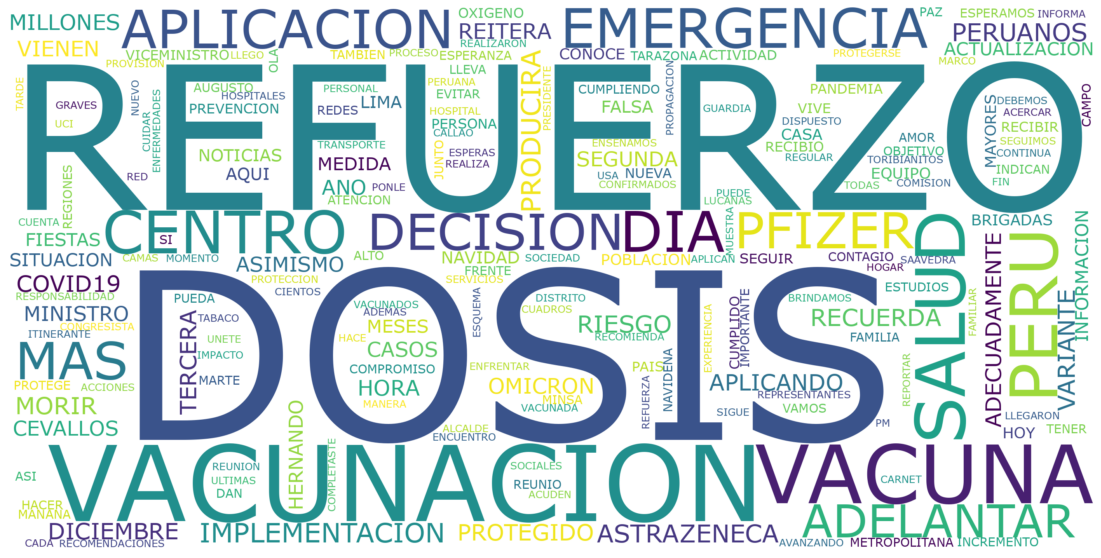

In [14]:
intelMinsa()

In [15]:
user_name = "@Minsa_Peru"

import pandas as pd
import datetime as dt


tweets = api.user_timeline(screen_name = user_name, 
                           count = 1000, 
                           include_rts = False,
                          tweet_mode="extended")

ids=[t['id'] for t in tweets]
dates=[t['created_at'] for t in tweets]
rts=[t['retweet_count'] for t in tweets]
likes=[t['favorite_count'] for t in tweets]
text=[t['full_text'] for t in tweets]



sms=pd.DataFrame({'ids':ids,'dates':dates,'rts':rts,'likes':likes,'text':text})
sms['dates']=pd.to_datetime(sms['dates'], infer_datetime_format=True).dt.strftime('%Y-%m-%d')
sms['dates']=pd.to_datetime(sms['dates'], infer_datetime_format=True)
sms.sort_values(by='dates',inplace=True)
sms.reset_index(drop=True,inplace=True)
sms.to_csv("victor.csv")


In [17]:
sms

,ids,dates,rts,likes,text
0,1471331152833175555,2021-12-16,98,401,ACTUALIZACIÓN | Esta es la situación de la #CO...
1,1471629500840562691,2021-12-16,90,453,ACTUALIZACIÓN | Esta es la situación de la vac...
2,1471616132767354880,2021-12-16,36,65,"🔴ATENCIÓN LIMA NORTE | Este 17, 18 y 19 de dic..."
3,1471609349374197765,2021-12-16,11,33,▶️ En las reuniones de intercambio de regalos ...
4,1471598247047221258,2021-12-16,10,35,#VacúnatePorTu2022 💪 | ¿Las vacunas contra la ...
...,...,...,...,...,...
194,1474190590124331009,2021-12-24,10,50,Valoremos cada momento vivido en unión familia...
195,1474176914558525440,2021-12-24,107,517,#LaSaludEsTuDerecho | Esta tarde llegaron al p...
196,1474175489480740874,2021-12-24,14,50,La vacunación es responsabilidad de todos. #Va...
197,1474209596172423173,2021-12-24,129,307,ACTUALIZACIÓN | Esta es la situación de la #CO...
